In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import defaultdict


In [203]:
# reading files
df = pd.read_csv('C:/Users/50304252/Documents/Proyectos_Udacity/Datasets/StackOverflow_Dataset/survey_results_public.csv')
schema = pd.read_csv('C:/Users/50304252/Documents/Proyectos_Udacity/Datasets/StackOverflow_Dataset/survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# looking into DeveloperType column
DevType = df['DeveloperType'].value_counts().reset_index()
DevType

,index,DeveloperType
0,Web developer,10683
1,Web developer; Desktop applications developer,1849
2,Mobile developer,1556
3,Web developer; Mobile developer,1503
4,Desktop applications developer,1433
...,...,...
1818,Web developer; Data scientist; Systems adminis...,1
1819,Web developer; Embedded applications/devices d...,1
1820,Web developer; Mobile developer; Embedded appl...,1
1821,Web developer; Mobile developer; Embedded appl...,1


In [205]:
# separating types of developer
possible_vals = ['Web developer','Mobile developer','Desktop applications developer','Other',
                 'Embedded applications/devices developer','Developer with a statistics or mathematics background',
                 'Data scientist','DevOps specialist','Quality assurance engineer','Machine learning specialist',
                 'Graphics programming','Database administrator','Systems administrator','Graphic designer']

In [206]:
#function to create separate types of developer

dgef total_func(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count/sum values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count or sum of df[col2]
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the value is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])

                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(col2, ascending=False, inplace=True)
    return new_df


In [207]:
#fuction to plot new df
def clean_and_plot(df, title, plot=True):
    '''
    INPUT 
        df - a dataframe holding the column name you want to look through
        title - string the title of your plot   
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        DevTypes_df - a dataframe with the count/sum of col2
    '''

    df.set_index(list(df.columns)[0], inplace=True)
    if plot:
        (df/df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_DevTypes_df = df/df.sum()
    return props_DevTypes_df
    


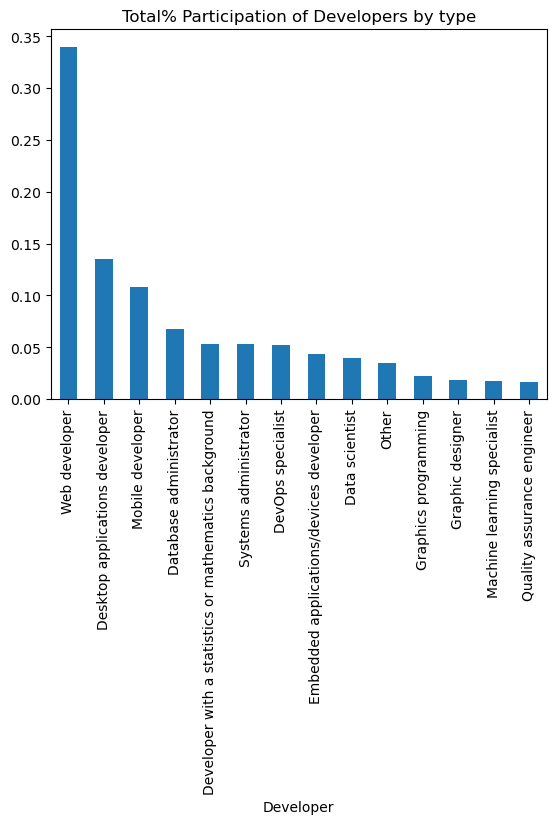

,Count
Developer,
Web developer,0.339572
Desktop applications developer,0.135065
Mobile developer,0.107767
Database administrator,0.067203
Developer with a statistics or mathematics background,0.052952
Systems administrator,0.052887
DevOps specialist,0.051968
Embedded applications/devices developer,0.043387
Data scientist,0.039413


In [208]:
Count_DevType = df['DeveloperType'].value_counts().reset_index()
Count_DevType.rename(columns={'index': 'Developer', 'DeveloperType': 'Count'}, inplace=True)
DevTypes_df = total_func(Count_DevType, 'Developer', 'Count', possible_vals)
title='Total% Participation of Developers by type'
clean_and_plot(DevTypes_df,title,plot=True)

In [209]:
JobS_DevType = df.groupby('DeveloperType')['JobSatisfaction'].sum().reset_index()
JobS_DevType.rename(columns={'DeveloperType': 'Developer', 'JobSatisfaction': 'JobSatisfaction_Sum'}, inplace=True)
JobS_DevType_df = total_func(JobS_DevType, 'Developer', 'JobSatisfaction_Sum', possible_vals)
JobS_DevType_df.set_index('Developer', inplace = True)
df_f = pd.merge(DevTypes_df,JobS_DevType_df,left_index=True, right_index=True)
df_f['Avg_JobSatisfaction'] = df_f['JobSatisfaction_Sum'] / df_f ['Count']

In [210]:
Salary_DevType = df.groupby('DeveloperType')['Salary'].sum().reset_index()
Salary_DevType.rename(columns={'DeveloperType': 'Developer', 'Salary': 'Salary_Sum'}, inplace=True)
Salary_DevType_df = total_func(Salary_DevType, 'Developer', 'Salary_Sum', possible_vals)
Salary_DevType_df.set_index('Developer', inplace = True)
df_final = pd.merge(df_f,Salary_DevType_df,left_index=True, right_index=True)
df_final['Avg_Salary_per_Type'] = df_final['Salary_Sum']/df_final['Count']

In [211]:
df_final['Avg_Salary_Total'] = df_final['Avg_Salary_per_Type'].mean()
df_final['Dif_avg_salary'] =  df_final['Avg_Salary_per_Type'] - df_final['Avg_Salary_Total'] 
df_final['%Dif_avg_salary'] = df_final['Dif_avg_salary']/df_final['Avg_Salary_per_Type']

In [212]:
df_final

,Count,JobSatisfaction_Sum,Avg_JobSatisfaction,Salary_Sum,Avg_Salary_per_Type,Avg_Salary_Total,Dif_avg_salary,%Dif_avg_salary
Developer,,,,,,,,
Web developer,26235,178149,6.790509,518183303,19751.602935,19541.926673,209.676262,0.010616
Desktop applications developer,10435,70140,6.721610,206645764,19803.139818,19541.926673,261.213144,0.013190
Mobile developer,8326,56995,6.845424,136935571,16446.741653,19541.926673,-3095.185021,-0.188194
Database administrator,5192,35553,6.847650,94536999,18208.204738,19541.926673,-1333.721935,-0.073248
Developer with a statistics or mathematics background,4091,27750,6.783183,84377266,20625.095576,19541.926673,1083.168902,0.052517
Systems administrator,4086,27946,6.839452,80047550,19590.687714,19541.926673,48.761041,0.002489
DevOps specialist,4015,28116,7.002740,102082009,25425.157908,19541.926673,5883.231234,0.231394
Embedded applications/devices developer,3352,22754,6.788186,65605702,19572.106802,19541.926673,30.180128,0.001542
Data scientist,3045,20761,6.818062,57774676,18973.621018,19541.926673,-568.305655,-0.029952


In [221]:
df_JobSatisfaction = df_final[['Avg_JobSatisfaction']]
df_JobSatisfaction

,Avg_JobSatisfaction
Developer,
Web developer,6.790509
Desktop applications developer,6.721610
Mobile developer,6.845424
Database administrator,6.847650
Developer with a statistics or mathematics background,6.783183
Systems administrator,6.839452
DevOps specialist,7.002740
Embedded applications/devices developer,6.788186
Data scientist,6.818062


In [224]:
Ind_avg_job_satisfaction= df_final['Avg_JobSatisfaction'].mean()

In [225]:
df_JobSatisfaction['Dif_Avg_Satisfaction'] = df_JobSatisfaction['Avg_JobSatisfaction'] - Ind_avg_job_satisfaction

C:\Users\50304252\AppData\Local\Temp\1\ipykernel_16180\314925441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_JobSatisfaction['Dif_Avg_Satisfaction'] = df_JobSatisfaction['Avg_JobSatisfaction'] - Ind_avg_job_satisfaction


In [226]:
df_JobSatisfaction.style.bar(subset=['Dif_Avg_Satisfaction'], align='mid', color=['#d65f5f', '#5fba7d'])

,Avg_JobSatisfaction,Dif_Avg_Satisfaction
Developer,,
Web developer,6.790509,-0.024065
Desktop applications developer,6.721610,-0.092964
Mobile developer,6.845424,0.030850
Database administrator,6.847650,0.033076
Developer with a statistics or mathematics background,6.783183,-0.031392
Systems administrator,6.839452,0.024877
DevOps specialist,7.002740,0.188165
Embedded applications/devices developer,6.788186,-0.026388
Data scientist,6.818062,0.003488


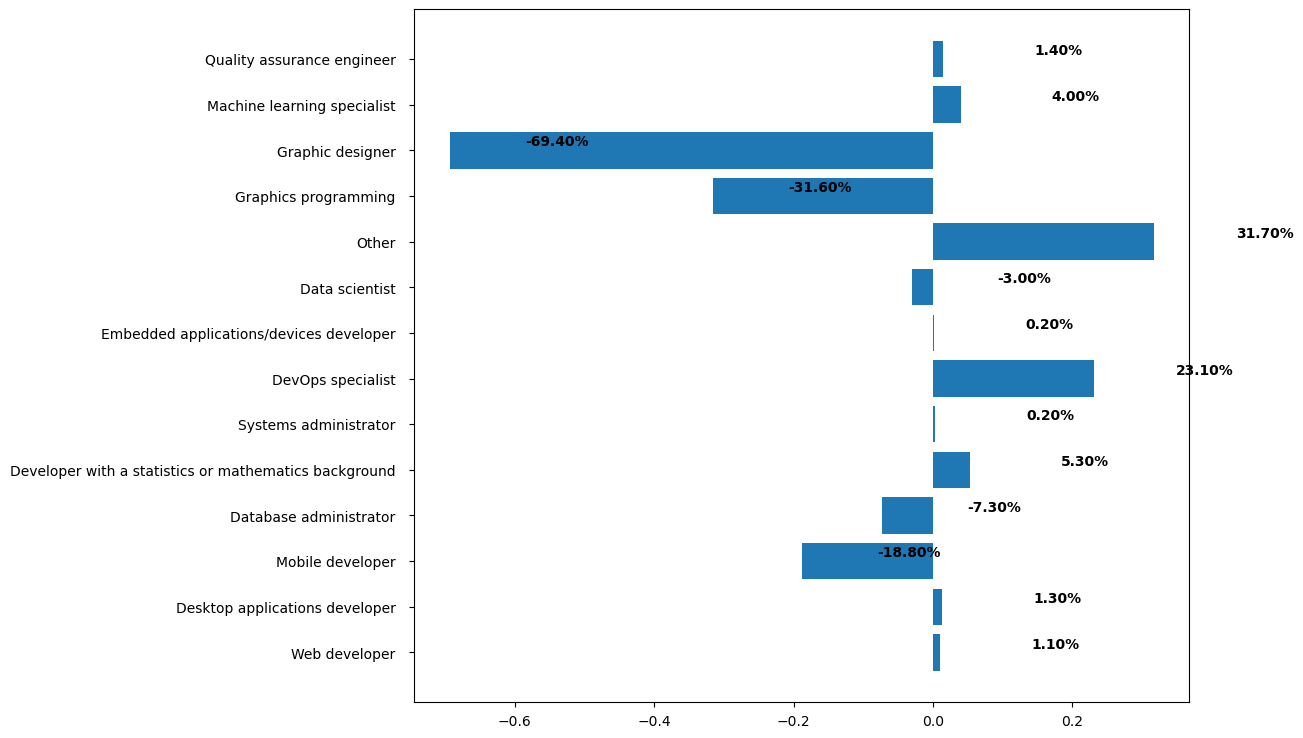

In [215]:
Developers = df_final.index
Avg_prc_Dif = df_final['%Dif_avg_salary']
fig, ax = plt.subplots(figsize =(10, 9))
ax.barh(Developers, Avg_prc_Dif)

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             '{:.2%}'.format(round((i.get_width()), 3)),
    fontsize = 10, fontweight ='bold',
    color ='black',
    ha = 'right')